# Tf-idf Vectorizer, Logistic Regression

In [1]:
from setup_corpus import build_corpora
corpora = build_corpora()
print(corpora)

Selected Category: description
description has 280 samples;
installation has 70 samples;
invocation has 70 samples;
citation has 70 samples;
Selected Category: installation
description has 200 samples;
installation has 800 samples;
invocation has 200 samples;
citation has 200 samples;
Selected Category: invocation
description has 279 samples;
installation has 279 samples;
invocation has 1118 samples;
citation has 279 samples;
Selected Category: citation
description has 77 samples;
installation has 77 samples;
invocation has 77 samples;
citation has 309 samples;
{'description':                                                excerpt  description
0    Puppeteer is a Node library which provides a h...         True
1    The major contributors of this repository incl...         True
2    Integral Regression is initially described in ...         True
3    We build a 3D pose estimation system based mai...         True
4    The Integral Regression is also known as soft-...         True
5    Thi

doing something haha

In [2]:
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
pipeline = make_pipeline(TfidfVectorizer(), LogisticRegression(solver='liblinear'))

cv = StratifiedKFold(n_splits = 5, shuffle=True)

In [3]:
for category in corpora:
    scores = cross_val_score(pipeline, corpora[category].excerpt, corpora[category][category], cv=cv)
    print(f"Category: {category}\nScores: {scores}\nAccuracy: {scores.mean():.4f} (+/- {scores.std()*2:.4f})")

Category: description
Scores: [0.86734694 0.83673469 0.85714286 0.80612245 0.82653061]
Accuracy: 0.8388 (+/- 0.0436)
Category: installation
Scores: [0.9        0.92142857 0.90357143 0.90357143 0.88928571]
Accuracy: 0.9036 (+/- 0.0207)
Category: invocation
Scores: [0.84183673 0.8494898  0.86445013 0.83076923 0.84102564]
Accuracy: 0.8455 (+/- 0.0224)
Category: citation
Scores: [0.93577982 0.87962963 0.87962963 0.89814815 0.91588785]
Accuracy: 0.9018 (+/- 0.0434)


In [4]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

Description ROC


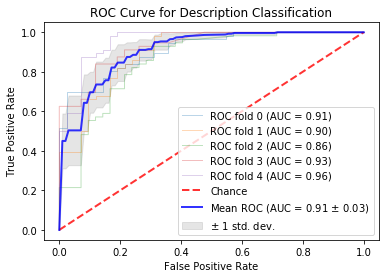

In [5]:
X = corpora['description'].excerpt
y = corpora['description'].description
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
    
i = 0
print('Description ROC')
for train, test in cv.split(X, y):
    probas_ = pipeline.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area under the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i+=1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Description Classification')
plt.legend(loc="lower right")
plt.show()

Installation ROC


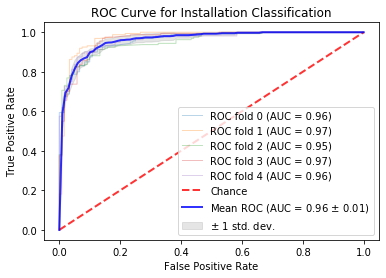

In [6]:
X = corpora['installation'].excerpt
y = corpora['installation'].installation
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
    
i = 0
print('Installation ROC')
for train, test in cv.split(X, y):
    probas_ = pipeline.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area under the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i+=1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Installation Classification')
plt.legend(loc="lower right")
plt.show()

Installation ROC


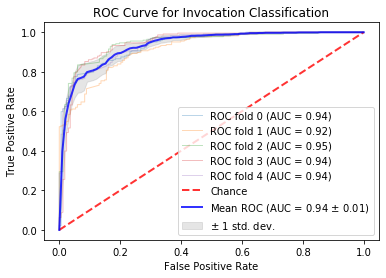

In [7]:
X = corpora['invocation'].excerpt
y = corpora['invocation'].invocation
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
    
i = 0
print('Installation ROC')
for train, test in cv.split(X, y):
    probas_ = pipeline.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area under the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i+=1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Invocation Classification')
plt.legend(loc="lower right")
plt.show()

Citation ROC


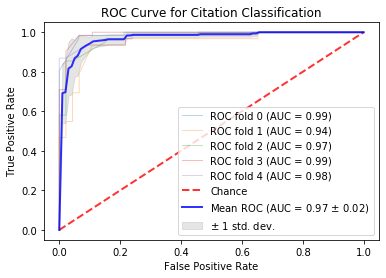

In [8]:
X = corpora['citation'].excerpt
y = corpora['citation'].citation
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
    
i = 0
print('Citation ROC')
for train, test in cv.split(X, y):
    probas_ = pipeline.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area under the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i+=1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Citation Classification')
plt.legend(loc="lower right")
plt.show()